<a href="https://colab.research.google.com/github/DheerajDinesh/CognoRise_Infotech/blob/Data_Science/SHOPPER_SENTIMENTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [56]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [57]:
df=pd.read_csv('/content/drive/MyDrive/CognoRise Infotech/Data_Science/TeePublic_review.csv',encoding='ISO-8859-1')
df

,reviewer_id,store_location,latitude,longitude,date,month,year,title,review,review-label
0,0.0,US,37.090240,-95.712891,2023,6,2015 00:00:00,Great help with lost order,I had an order that was lost in transit. When ...,5
1,1.0,US,37.090240,-95.712891,2023,6,2024 00:00:00,I ordered the wrong size tee and hadï¿½ï¿½ï¿½,I ordered the wrong size tee and had difficult...,5
2,2.0,US,37.090240,-95.712891,2023,6,2017 00:00:00,These guys offer the best customerï¿½ï¿½ï¿½,These guys offer the best customer service in ...,5
3,3.0,US,37.090240,-95.712891,2023,6,2024 00:00:00,Good Stuff,Looked for an obscure phrase on a shirt. Teepu...,5
4,4.0,CA,56.130366,-106.346771,2023,6,2023 00:00:00,My order arrived in a good timelyï¿½ï¿½ï¿½,My order arrived in a good timely fashion & th...,4
...,...,...,...,...,...,...,...,...,...,...
278095,278095.0,US,37.090240,-95.712891,2018,4,2027 00:00:00,Highly recommend!,"Delivery is quick, arrives when promised. Shir...",5
278096,278096.0,HR,45.100000,15.200000,2018,4,2027 00:00:00,Great quality,"Great quality, fast delivery, would recommend!",5
278097,278097.0,US,37.090240,-95.712891,2018,4,2027 00:00:00,Dudes rock.,Dudes rock. Seriously.,5
278098,278098.0,US,37.090240,-95.712891,2018,4,2027 00:00:00,Shipping was fast the T-shirt was justï¿½ï¿½ï¿½,Shipping was fast the T-shirt was just right g...,5


In [58]:
df.head()

,reviewer_id,store_location,latitude,longitude,date,month,year,title,review,review-label
0,0.0,US,37.090240,-95.712891,2023,6,2015 00:00:00,Great help with lost order,I had an order that was lost in transit. When ...,5
1,1.0,US,37.090240,-95.712891,2023,6,2024 00:00:00,I ordered the wrong size tee and hadï¿½ï¿½ï¿½,I ordered the wrong size tee and had difficult...,5
2,2.0,US,37.090240,-95.712891,2023,6,2017 00:00:00,These guys offer the best customerï¿½ï¿½ï¿½,These guys offer the best customer service in ...,5
3,3.0,US,37.090240,-95.712891,2023,6,2024 00:00:00,Good Stuff,Looked for an obscure phrase on a shirt. Teepu...,5
4,4.0,CA,56.130366,-106.346771,2023,6,2023 00:00:00,My order arrived in a good timelyï¿½ï¿½ï¿½,My order arrived in a good timely fashion & th...,4


In [59]:
df.tail()

,reviewer_id,store_location,latitude,longitude,date,month,year,title,review,review-label
278095,278095.0,US,37.09024,-95.712891,2018,4,2027 00:00:00,Highly recommend!,"Delivery is quick, arrives when promised. Shir...",5
278096,278096.0,HR,45.10000,15.200000,2018,4,2027 00:00:00,Great quality,"Great quality, fast delivery, would recommend!",5
278097,278097.0,US,37.09024,-95.712891,2018,4,2027 00:00:00,Dudes rock.,Dudes rock. Seriously.,5
278098,278098.0,US,37.09024,-95.712891,2018,4,2027 00:00:00,Shipping was fast the T-shirt was justï¿½ï¿½ï¿½,Shipping was fast the T-shirt was just right g...,5
278099,NaN,US,37.09024,-95.712891,2018,4,2027 00:00:00,Not great quality,Print of t shirt was blurry and appeared faded...,2


In [60]:
df.dtypes

reviewer_id       float64
store_location     object
latitude          float64
longitude         float64
date                int64
month               int64
year               object
title              object
review             object
review-label        int64
dtype: object

In [61]:
df.drop(['reviewer_id'],axis=1,inplace=True)
df

,store_location,latitude,longitude,date,month,year,title,review,review-label
0,US,37.090240,-95.712891,2023,6,2015 00:00:00,Great help with lost order,I had an order that was lost in transit. When ...,5
1,US,37.090240,-95.712891,2023,6,2024 00:00:00,I ordered the wrong size tee and hadï¿½ï¿½ï¿½,I ordered the wrong size tee and had difficult...,5
2,US,37.090240,-95.712891,2023,6,2017 00:00:00,These guys offer the best customerï¿½ï¿½ï¿½,These guys offer the best customer service in ...,5
3,US,37.090240,-95.712891,2023,6,2024 00:00:00,Good Stuff,Looked for an obscure phrase on a shirt. Teepu...,5
4,CA,56.130366,-106.346771,2023,6,2023 00:00:00,My order arrived in a good timelyï¿½ï¿½ï¿½,My order arrived in a good timely fashion & th...,4
...,...,...,...,...,...,...,...,...,...
278095,US,37.090240,-95.712891,2018,4,2027 00:00:00,Highly recommend!,"Delivery is quick, arrives when promised. Shir...",5
278096,HR,45.100000,15.200000,2018,4,2027 00:00:00,Great quality,"Great quality, fast delivery, would recommend!",5
278097,US,37.090240,-95.712891,2018,4,2027 00:00:00,Dudes rock.,Dudes rock. Seriously.,5
278098,US,37.090240,-95.712891,2018,4,2027 00:00:00,Shipping was fast the T-shirt was justï¿½ï¿½ï¿½,Shipping was fast the T-shirt was just right g...,5


In [62]:
df.isna().sum()

store_location        0
latitude              0
longitude             0
date                  0
month                 0
year                  0
title                12
review            30503
review-label          0
dtype: int64

In [63]:
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)
df.isna().sum()

store_location    0
latitude          0
longitude         0
date              0
month             0
year              0
title             0
review            0
review-label      0
dtype: int64

In [64]:
df['year'].value_counts()

year
2028 00:00:00    9113
2021 00:00:00    8819
2001 00:00:00    8666
2016 00:00:00    8610
2015 00:00:00    8592
2020 00:00:00    8451
2019 00:00:00    8388
2007 00:00:00    8387
2014 00:00:00    8346
2004 00:00:00    8337
2027 00:00:00    8267
2025 00:00:00    8199
2022 00:00:00    8187
2017 00:00:00    8161
2018 00:00:00    8141
2009 00:00:00    8117
2010 00:00:00    8044
2006 00:00:00    8041
2005 00:00:00    8001
2026 00:00:00    7950
2002 00:00:00    7914
2023 00:00:00    7886
2011 00:00:00    7828
2012 00:00:00    7756
2024 00:00:00    7743
2013 00:00:00    7655
2029 00:00:00    7655
2008 00:00:00    7616
2003 00:00:00    7595
2030 00:00:00    6940
2031 00:00:00    4183
Name: count, dtype: int64

In [65]:
df['year']=pd.to_datetime(df['year'])
df['year']=pd.DatetimeIndex(df['year']).year
df

<ipython-input-65-e6ccc9823c9f>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['year']=pd.to_datetime(df['year'])


,store_location,latitude,longitude,date,month,year,title,review,review-label
0,US,37.090240,-95.712891,2023,6,2015,Great help with lost order,I had an order that was lost in transit. When ...,5
1,US,37.090240,-95.712891,2023,6,2024,I ordered the wrong size tee and hadï¿½ï¿½ï¿½,I ordered the wrong size tee and had difficult...,5
2,US,37.090240,-95.712891,2023,6,2017,These guys offer the best customerï¿½ï¿½ï¿½,These guys offer the best customer service in ...,5
3,US,37.090240,-95.712891,2023,6,2024,Good Stuff,Looked for an obscure phrase on a shirt. Teepu...,5
4,CA,56.130366,-106.346771,2023,6,2023,My order arrived in a good timelyï¿½ï¿½ï¿½,My order arrived in a good timely fashion & th...,4
...,...,...,...,...,...,...,...,...,...
247583,US,37.090240,-95.712891,2018,4,2027,Highly recommend!,"Delivery is quick, arrives when promised. Shir...",5
247584,HR,45.100000,15.200000,2018,4,2027,Great quality,"Great quality, fast delivery, would recommend!",5
247585,US,37.090240,-95.712891,2018,4,2027,Dudes rock.,Dudes rock. Seriously.,5
247586,US,37.090240,-95.712891,2018,4,2027,Shipping was fast the T-shirt was justï¿½ï¿½ï¿½,Shipping was fast the T-shirt was just right g...,5


<Axes: xlabel='review-label', ylabel='count'>

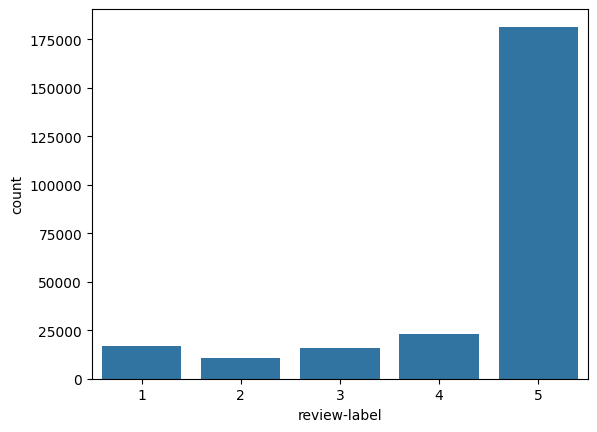

In [66]:
sns.countplot(x='review-label',data=df)

In [71]:
text=df.review
text

0         I had an order that was lost in transit. When ...
1         I ordered the wrong size tee and had difficult...
2         These guys offer the best customer service in ...
3         Looked for an obscure phrase on a shirt. Teepu...
4         My order arrived in a good timely fashion & th...
                                ...                        
247583    Delivery is quick, arrives when promised. Shir...
247584       Great quality, fast delivery, would recommend!
247585                               Dudes rock. Seriously.
247586    Shipping was fast the T-shirt was just right g...
247587    Print of t shirt was blurry and appeared faded...
Name: review, Length: 247588, dtype: object

Lowercase, RE, Stopwords, Stemming, Tokenization(text split)

In [79]:
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
sw=stopwords.words('english')

def clean(text):
    text = str(text).lower()  # convert to lowercase

    text=re.sub('\[.*?\]', '', text)  # removes all regular expressions
    text=re.sub('https?://\S+|www\.\S+', '', text)
    text=re.sub('<.*?>+', '', text)
    text=re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text=re.sub('\n', '', text)
    text=re.sub('\w*\d\w*', '', text)  # removal complete

    # text=[word for word in text.split(' ') if word not in sw]  # removes stopwords
    # text=" ".join(text)

    text=[word for word in text.split(' ') if word not in sw]  # removes stopwords
    text=" ".join(text)

    text=[stemmer.stem(word) for word in text.split(' ')] # stemming
    text=" ".join(text)
    return text


text = text.apply(clean)

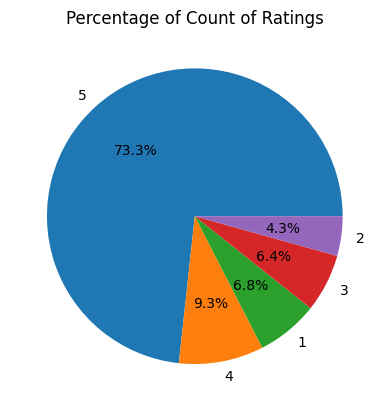

In [89]:
ratings = df['review-label'].value_counts()
numbers = ratings.index
quantity = ratings.values

plt.pie(x=ratings, labels=numbers, autopct='%1.1f%%')
plt.title('Percentage of Count of Ratings')
plt.show()

In [93]:
import nltk
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
df['Positive'] = [sentiments.polarity_scores(i)['pos'] for i in df['review']]

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [94]:
df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df["review"]]

In [95]:
df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df["review"]]

In [96]:
df = df[["review", "Positive", "Negative", "Neutral",'review-label']]
df.head()

,review,Positive,Negative,Neutral,review-label
0,I had an order that was lost in transit. When ...,0.087,0.074,0.839,5
1,I ordered the wrong size tee and had difficult...,0.195,0.114,0.691,5
2,These guys offer the best customer service in ...,0.252,0.000,0.748,5
3,Looked for an obscure phrase on a shirt. Teepu...,0.270,0.000,0.730,5
4,My order arrived in a good timely fashion & th...,0.206,0.060,0.733,4


In [98]:
pos=sum(df['Positive'])
neg=sum(df['Negative'])
neu=sum(df['Neutral'])
print('Positive :',pos)
print('Negative :',neg)
print('Positive :',neu)

Positive : 72532.65699999726
Negative : 7604.748000000086
Positive : 167448.3940000028


In [102]:
print('Review Data is',end=' ')
if pos>neg and pos>neu:
  print('Positive')
elif neg>pos and neg>neu:
  print('Negative')
else:
  print('Neutral')

Review Data is Neutral
